## Content

- Bivariate Data Visualization
  - Continous-Continous
    - Line plot
    - Styling and Labelling
    - Scatterplot
  - Categorical-Categorical
    - Dodged countplot
    - Stacked countplot
  - Categorical-Continuous
    - Multiple BoxPlots
    - Multiple KDE Plots
  - JointPlot, pairplot, heatmap
- Multivariate Data Visualization
  - CCN
  - CNN
  - NNN
- Subplots
- Jointplot
- Pairplot
- Heatmaps and correlation


#### Importing the data

In [55]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166" -O vgsales.csv

zsh:1: command not found: wget


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,Â¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [58]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16652.000000,16381.000000,16652.000000,16652.000000,16652.000000,16652.000000,16652.000000
mean,8283.409620,2006.390513,2.752314,1.996875,2.499677,1.151829,8.457873
std,4794.471477,5.863261,1.327002,1.322972,1.164023,1.054813,3.717756
min,1.000000,1980.000000,0.140000,0.010000,0.000000,-0.474276,0.240000
25%,4129.750000,2003.000000,1.781124,1.087977,1.781124,0.394830,5.580341
50%,8273.500000,2007.000000,2.697415,1.714664,2.480356,0.491870,7.536614
75%,12436.250000,2010.000000,3.677290,2.795123,3.176299,1.781124,11.227334
max,16600.000000,2020.000000,8.725452,8.367985,12.722984,7.358020,30.555862


If you notice, `Genres`, `Publisher` and `Platform` are categorical values

Since we have a lot of categories of each of them, we will use top 3 of each to make our analysis easier

In [59]:
data["Publisher"].value_counts().index[:3]

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games'], dtype='object', name='Publisher')

In [60]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]
top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


## Bivariate Data Visualization

### Continous-Continous

So far we have been analyzing only a single feature.

But what if we want to visualize two features at once?


#### What kind of questions can we ask regarding a continous-continous pair of features?
- Maybe show relation between two features, like **how does the sales vary over the years**?
- Or show **how are the features associated, positively or negatively**?

...And so on

<!-- #### What is analyzing two features/columns together called?

**Bivariate analysis** -->

Let's go back to the line plot we plotted at the very beginning

### Line Plot

#### How can we plot the sales trend over the years for the longest running game?

First, let's find the longest running game first

In [61]:
data['Name'].value_counts()

Name
Ice Hockey                                       41
Baseball                                         17
Need for Speed: Most Wanted                      12
Ratatouille                                       9
FIFA 14                                           9
                                                 ..
Indy 500                                          1
Indy Racing 2000                                  1
Indycar Series 2005                               1
inFAMOUS                                          1
Zyuden Sentai Kyoryuger: Game de Gaburincho!!     1
Name: count, Length: 11493, dtype: int64

Great, so `Ice Hockey` is longer running than most games

Let's try to find the sales trend in North America of the same across the years

<Axes: xlabel='Year', ylabel='NA_Sales'>

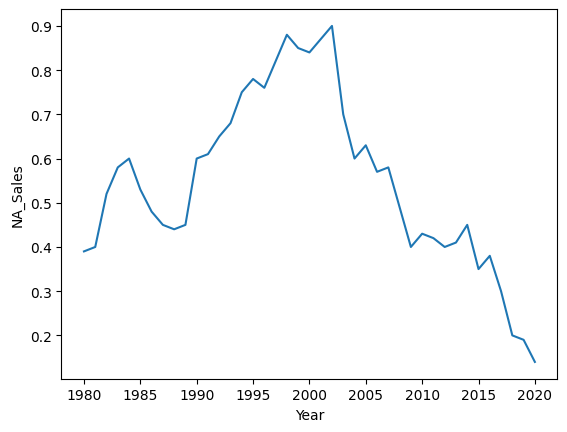

In [62]:
ih = data.loc[data['Name']=='Ice Hockey']
sns.lineplot(x='Year', y='NA_Sales', data=ih)

#### What can we infer from this graph?

- The sales across North America seem to have been boosted in the years of 1995-2005
- Post 2010 though, the sales seem to have taken a dip

Line plot are great to represending trends such as above, over time

### Style and Labelling

We already learnt in barplot how to add **titles, x-label and y-label**

Let's add the same here



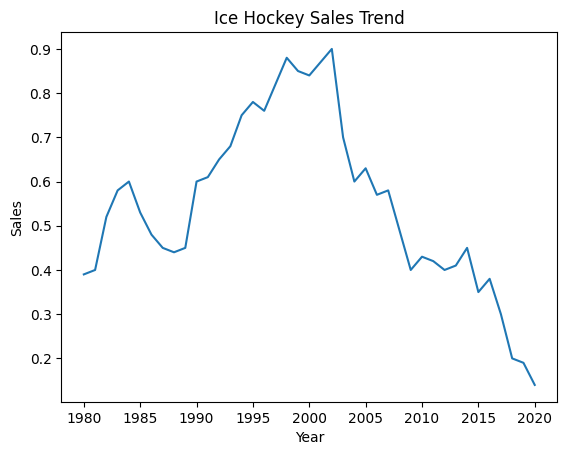

In [63]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.show()

<!-- #### How are these values useful though ?

- It gives **meaning of values** on x and y axis in **lables**
- Mention the purpose of plot using **title** -->

#### Now what if we want to change the colour of the curve ?

`sns.lineplot()` contains an argument **color**
- It takes as argument a matplotlib color

  OR
- as string for some defined colours like:
    - black: `k`/ `black`
    - red: `r`/`red` etc

**But what all colours can we use ?**

Matplotlib provides a lot of colours 
  
Check the documentation for more colours

https://matplotlib.org/2.0.2/api/colors_api.html


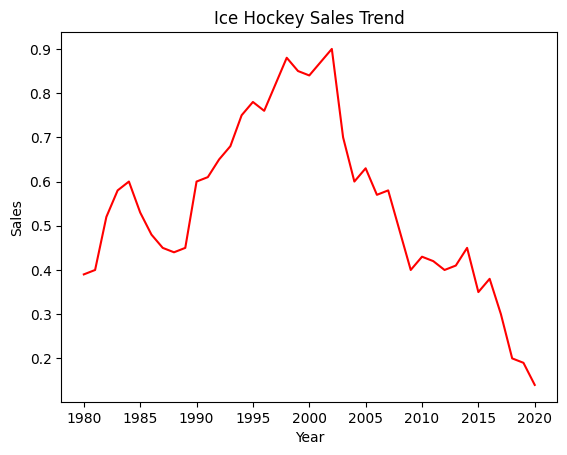

In [64]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='NA_Sales', data=ih, color='r')
plt.show()

Now, lets say we only want to show the values from years 1990-2000

#### How can we limit our plot to only the last decade of 20th century?

This requires changing the range of x-axis
  
#### But how can we change the range of an axis in matplotlib ?
 
We can use:
- `plt.xlim()`: x-axis
- `plt.ylim()`: y-axis

These funcs take same 2 args:
  1. `left`: Starting point of range
  2. `right`: End point of range


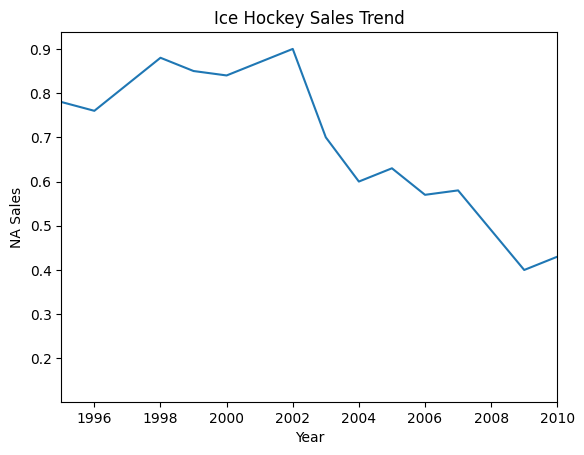

In [65]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('NA Sales')
plt.xlim(left=1995,right=2010)
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.show()

So far we have visualised a single plot to understand it

**What if we want to compare it with some other plot?**

Say, we want to compare the same sales trend between two games
- Ice Hockey
- Baseball

Let's first plot the trend for "Baseball"


<Axes: xlabel='Year', ylabel='NA_Sales'>

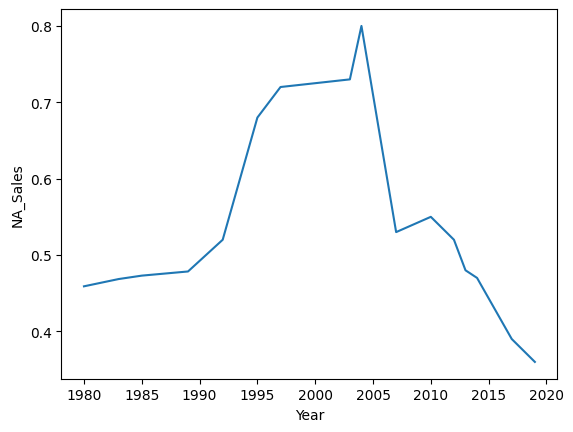

In [66]:
baseball = data.loc[data['Name']=='Baseball']
sns.lineplot(x='Year', y='NA_Sales', data=baseball)

Now, to compare these, so we will have to draw these plots in the same figure

#### How can we plot multiple plots in the same figure ?



<Axes: xlabel='Year', ylabel='NA_Sales'>

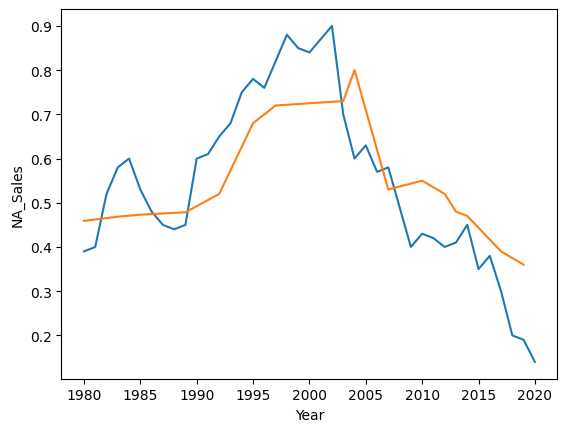

In [67]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)

We can use multiple `sns.lineplot()` funcs

Observe:
  
Seaborn automatically created 2 plots with **different colors**

#### However how can we know which colour is of which plot ?
  - sns.lineplot() has another argument **label** to do so
  - We can simply set the label of each plot


<Axes: xlabel='Year', ylabel='NA_Sales'>

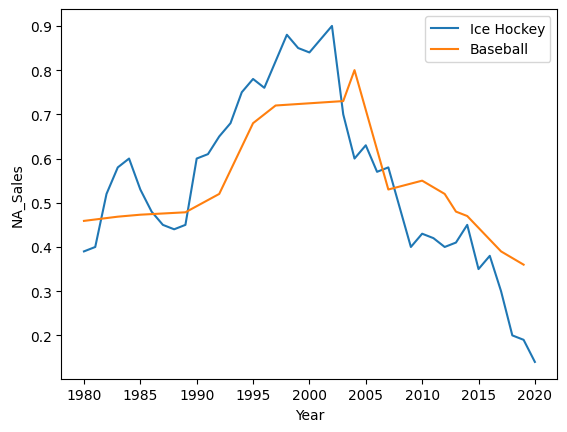

In [68]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')

We can also pass these labels in plt.legend() as a list in the order plots are done

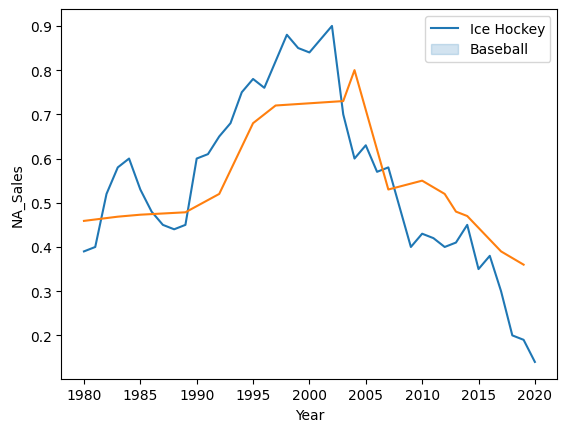

In [69]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'])
plt.show()

#### Now can we change the position of the legend, say, to bottom-right corner?

  - Matplotlib automatically decides the best position for the legends
  
  - But we can also change it using the `loc` parameter
  
  - `loc` takes input as 1 of following strings:
    - upper center
    - upper left
    - upper right
    - lower right ... etc
  

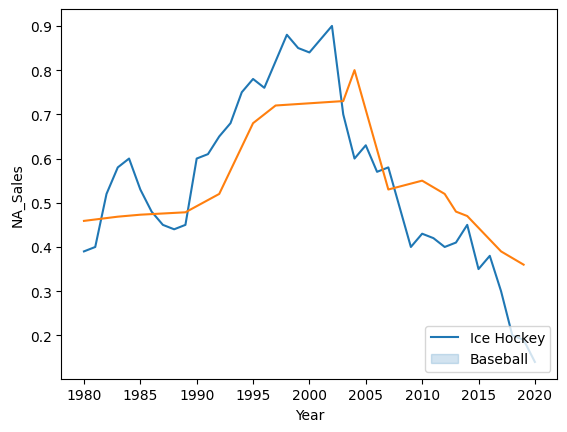

In [70]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower right')
plt.show()

#### Now what if we want the legend to be outside the plot?

Maybe the plot is too congested to show the legend

We can use the same `loc` parameter for this too

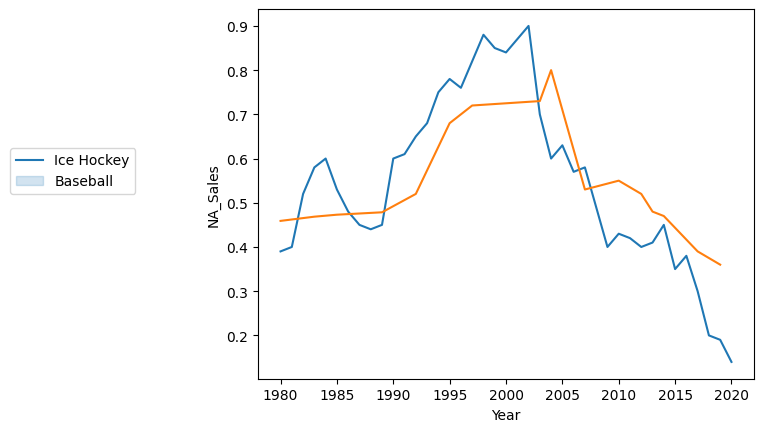

In [71]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc=(-0.5,0.5))
plt.show()

The pair of floats signify the (x,y) coordinates for the legend

==> From this we can conclude `loc` takes **two types of arguments**:
- The location in the **form of string**
- The location in the **form of coordinates**

#### What if we want to add other stylings to legends ?
For eg:
    
- Specify the **number of rows/cols**
  - Uses parameter `ncols` for this
  - The number of **rows are decided automatically**
    
- Decide if we want the box of legends to be displayed
  - Use the bool param `frameon`

and so on.


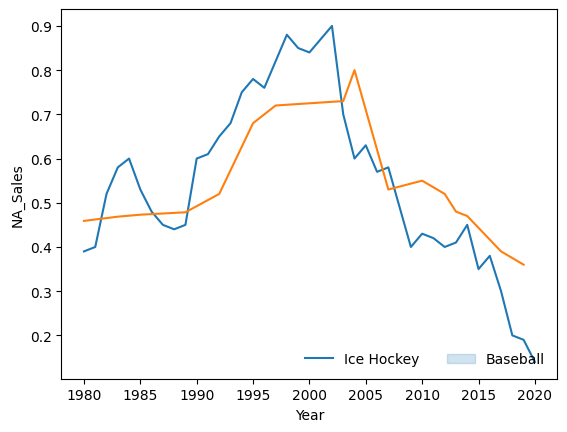

In [72]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower right', ncol = 2, frameon = False)
plt.show()

Now say we want to highlight a point on our curve.

For e.g.

#### How can we highlight the maximum "Ice Hockey" sales across all years ?

Let's first find this point


In [73]:
print(max(ih['NA_Sales']))

0.9


If we observe, this point lies in the year 2004-5 around

Now we need to add text to this point (2004,0.9)

#### How can we add text to a point in a figure ?

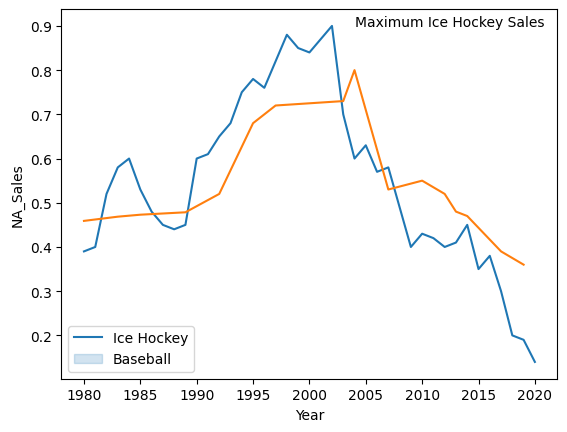

In [74]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower left')
plt.text(2004,max(ih['NA_Sales']), 'Maximum Ice Hockey Sales')
plt.show()

By using `plt.text()`

  - Pass in the **x and y coordinates** where we want the text to appear

  - Pass in the **text string**

We can also use `plt.grid()` to show the grid layout in the background


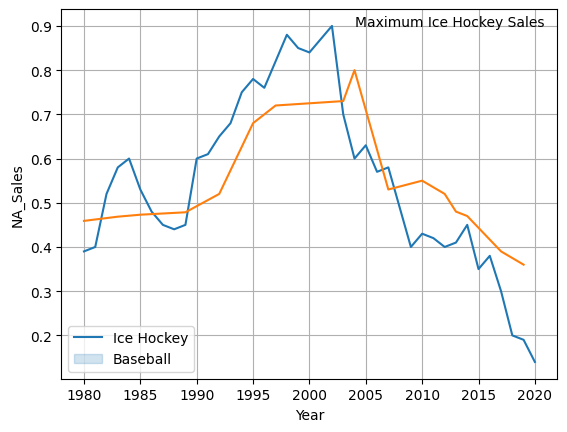

In [75]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower left')
plt.text(2004,max(ih['NA_Sales']), 'Maximum Ice Hockey Sales')
plt.grid()
plt.show()

Note:

We can **pass in parameters inside `plt.grid()` to control its density, colour of grid lines, etc.**


You can look it up later on how to customize the grid 

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

### Scatter Plot

Now suppose we want to find the relation between `Rank` and `Sales` of all games.

#### Are `Rank` and `Sales` positively or negatively correlated?

In this case, unlike line plot, there maybe multiple points in y-axis for each point in x-axis

In [76]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,Â¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


#### How can we plot the relation between `Rank` and `Global Sales`?

Can we use lineplot? 

Let's try it out

<Axes: xlabel='Rank', ylabel='Global_Sales'>

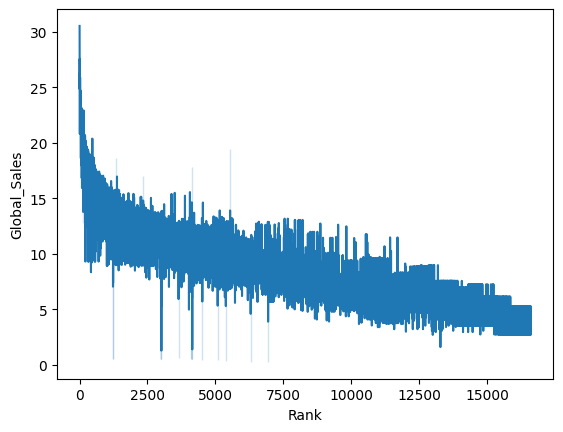

In [77]:
sns.lineplot(data=data, x='Rank', y='Global_Sales')

The plot itself looks very messy and it's hard to find any patterns from it.

#### Is there any other way we can visualize this relation?

Use scatter plot

<Axes: xlabel='Rank', ylabel='Global_Sales'>

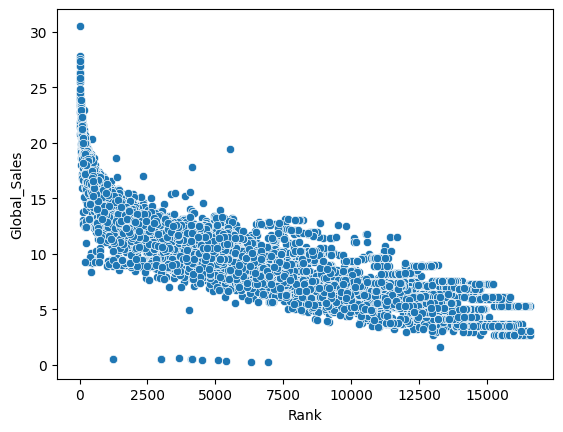

In [78]:
sns.scatterplot(data=data, x='Rank', y='Global_Sales')

Compared to lineplot, we are able to see the patterns and points more distinctly now!

Notice,

- The two variables are negatively correlated with each other

- With increase in ranks, the sales tend to go down, implying, lower ranked games have higher sales overall!

Scatter plots help us visualize these relations and find any patterns in the data

Key Takeaways:

- For Continuous-Continuous Data => Scatter Plot, Line Plot

Sometimes, people also like to display the linear trend between two variables - Regression Plot, do check that

## Categorical-Categorical

Earlier we saw how to work with continous-continuous pair of data

Now let's come to the second type of pair of data: **Categorical-Categorical**

#### What questions comes to your mind when we say categorical-categorical pair?

Questions related to distribution of a category within another category
  - What is the **distribution of genres for top-3 publishers**?
  - Which **platforms do these top publishers use?**


#### Which plot can we use to show distribution of one category with respect to another?

-> We can have can **have multiple bars for each category**

- These multiple bars can be stacked together - **Stacked Countplot**

Or 

- Can be placed next to each other - **Dodged Countplot**


### Dodged Count Plot

#### How can we compare the top 3 platforms these publishers use?

We can use a dodged countplot in this case

Text(0, 0.5, 'Count of Games')

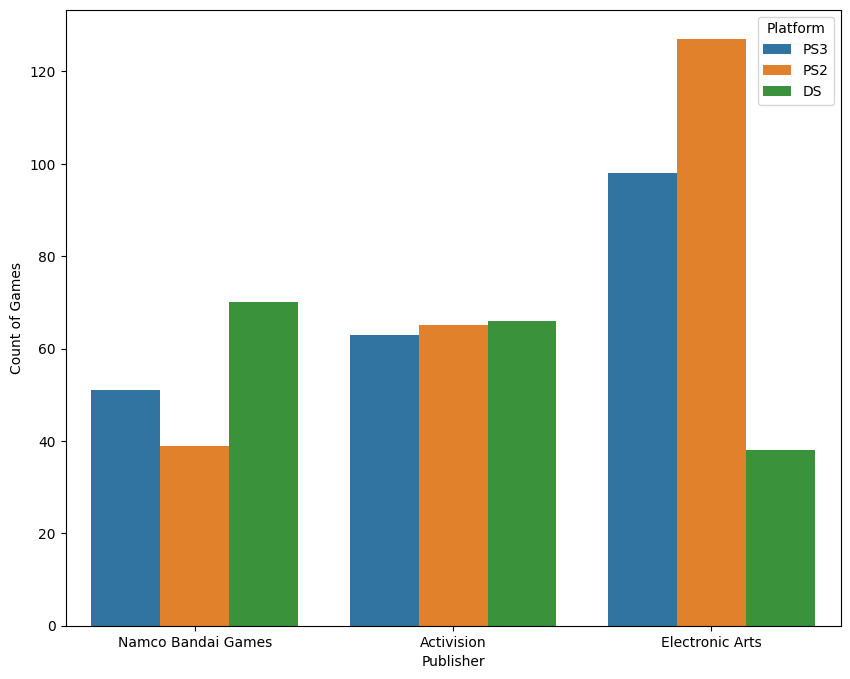

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(x='Publisher',hue='Platform',data=top3_data)
plt.ylabel('Count of Games')

#### What can we infer from the dodged countplot?
- EA releases PS2 games way more than any other publisher, or even platform!
- Activision has almost the same count of games for all 3 platforms
- EA is leading in PS3 and PS2, but Namco leads when it comes to DS platform

### Stacked Countplot

#### How can we visualize the distribution of genres for top-3 publishers?

We can use a `stacked countplot`

Do refer the postread for the code on how to plot it






![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/545/original/download_%281%29.png?1671006217)

But stacked countplots can be misleading

Some may find it difficult to understand if it starts from baseline 
or from on top of the bottom area



#### How do we decide between a Stacked countplot and Dodged countlot?

- Stacked countplots are a good way to represent totals
- While dodged countplots helps us to comapare values between various categories, and within the category itself too


## Continous-Categorical

Now let's look at our 3rd type of data pair

#### What kind of questions we may have regarding a continuous-categorical pair?

- We might to want calculate some numbers category wise
  - Like **What is the average sales for every genre?**
- Or we might be interested in checking the distribution of the data category-wise
  -  **What is the distribution of sales for the top3 publishers?**

#### What kind of plot can we make for every category?

-> Either KDE plot or Box Plot per category

### Boxplot

#### What is the distribution of sales for the top3 publishers?


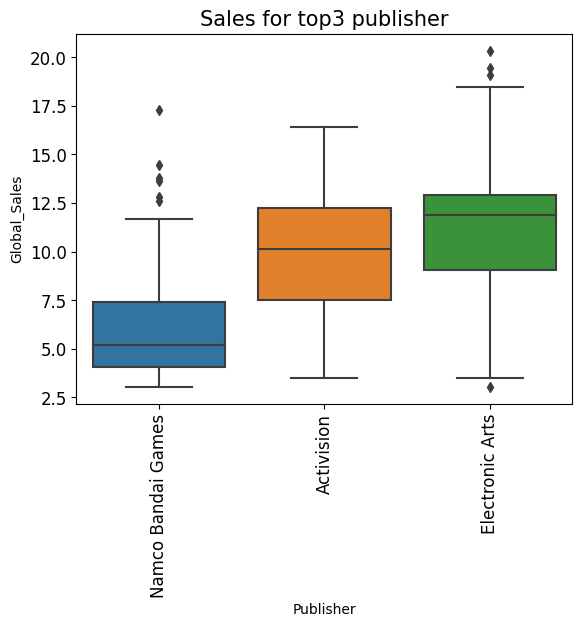

In [80]:
sns.boxplot(x='Publisher', y='Global_Sales', data=top3_data)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sales for top3 publisher', fontsize=15)
plt.show()

#### What can we infer from this plot?

- The overall sales of EA is higher, with a much larger spread than other publishers
- Activision doesn't have many outliers, and if you notice, even thought the spread is lesser than EA, the median is almost the same

#### Barplot

What if we want to compare the sales between the genres?

We have to use:
- Genre (categorical)
- Mean of global sales per genre (numerical)

#### How to visualize which genres bring higher average global sales?

<Axes: xlabel='Genre', ylabel='Global_Sales'>

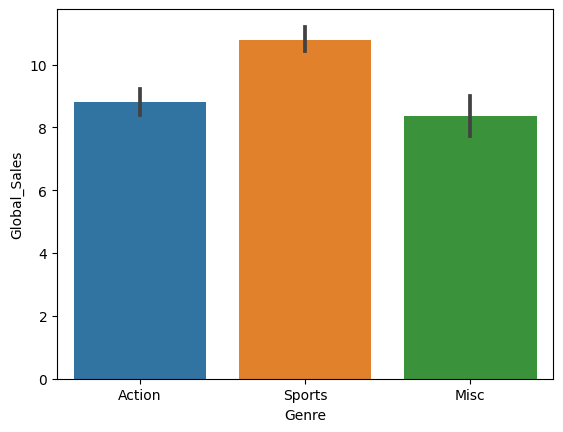

In [81]:
sns.barplot(data=top3_data, x="Genre", y="Global_Sales", estimator=np.mean)

If you remember, we had earlier seen EA had a larger market share of sales

Along with this fact, majority of games EA made was sports

This ultimately proves the fact that Sports has a high market share in the industry, as shown in the barchart

## Multivariate

Let’s try to add 3rd variable on the top of the plots we have seen so far




#### NNC

#### How can we visualize the correlation between NA and EU, but for different genres?

Here, we have two numerical and one categorical variable!

Numerical-Numerical → Scatterplot, need to add info about one categorical variable
	
Numerical-Categorical → Boxplot, need to add info about one numerical variable

#### Let's ask two questions
- Is it Possible to add information about a continuous variable upon boxplots?
  - Perhaps No
- Is it Possible to add information about a categorical variable on scatterplot?
  - Yes, use colors

Solution: Scatterplot with color

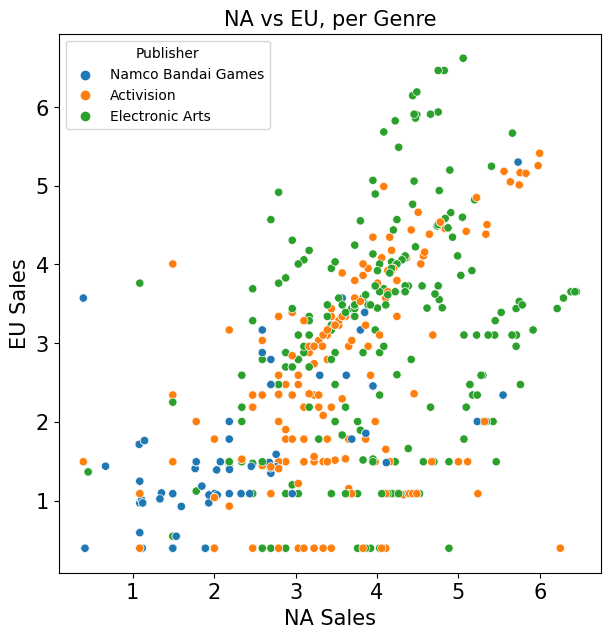

In [82]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='NA_Sales', y='EU_Sales',hue='Publisher',data=top3_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('NA Sales',fontsize=15)
plt.ylabel('EU Sales',fontsize=15)
plt.title('NA vs EU, per Genre', fontsize=15)
plt.show()

Inferences:
- If we see this plot, we can notice now that Namco has lower sales correlation, while Activision has a concentrated positivee correlation
- EA also has positive correlation, but it's more spread compared to Activision


## CCN

#### Now, how will you visualize Global Sales for each publisher, but separated by Genres?

We have two categorical and one numerical data here!

- Categorical-Categorical → Stacked Barplot, need to add info about one continuous feature

- Categorical-Numerical → Boxplots, need to add categorical variable

Which one is easier and possible?
We can add one categorical variable by “dodging” multiple boxplots

Solution: Dodged Boxplots 
	

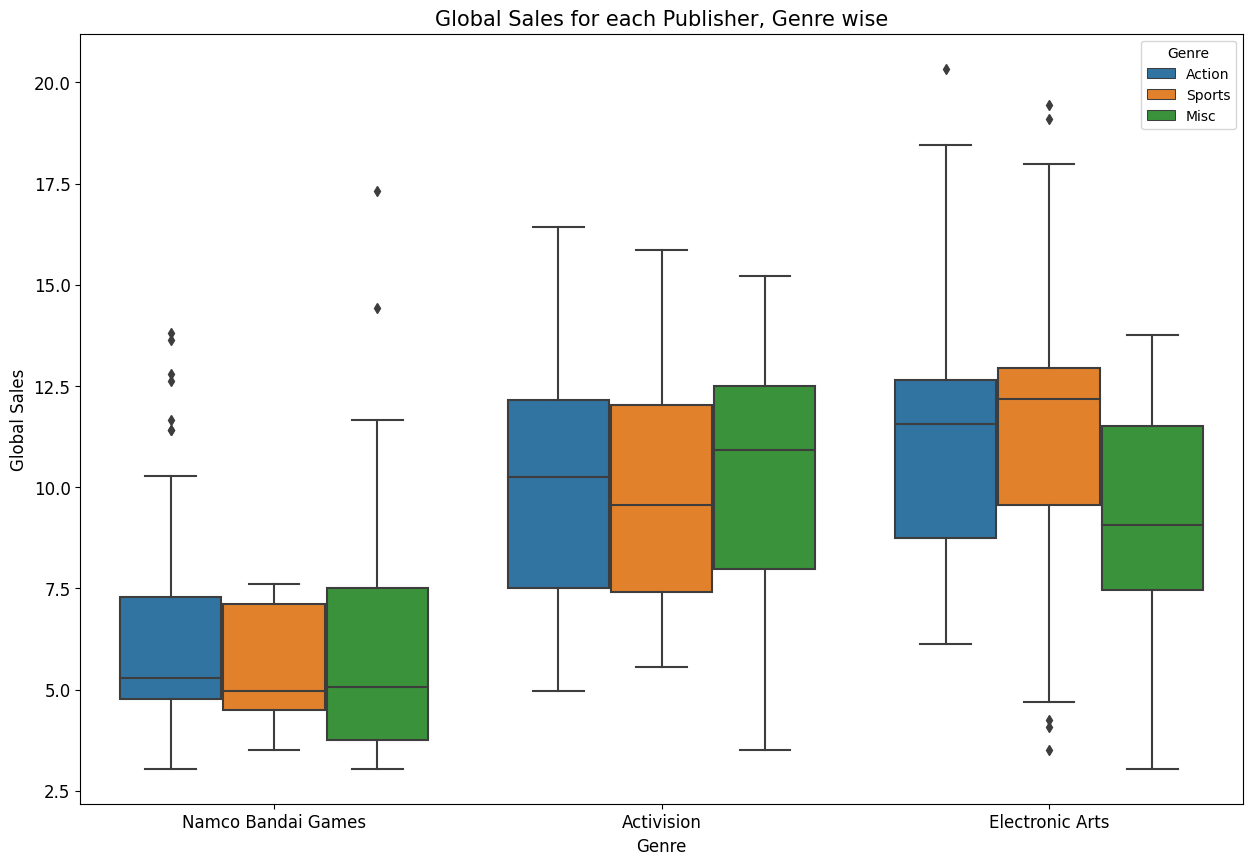

In [83]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Publisher',y='Global_Sales',hue='Genre',data=top3_data)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Global Sales for each Publisher, Genre wise', fontsize=15)
plt.show()

Inferences:

- Namco has lower median sales in every Genre as compared to all publishers

- Looking at `Action` Genre, even though EA and Activision has almost similar medians, Action is more spread in EA

- An interesting thing to notice here is that, for each of the three publishers, three different genre of games have higher sales median:
  - Namco: Action
  - Activision: Misc
  - EA: Sports


## NNN

So far we have seen how NA and EU are correlated with each other.

But how can we compare the data when we have 3 numerical variables?

#### Say, the question is, how does rank affect the correlation between NA and EU Sales?

We have used scatter plot for two numerical features, we have two options here
- Make a 3D Scatterplot 
  - → nice for 3D viz, but tough to report/show in static setting
- Add info about 3rd feature on the 2D scatter plot itself  
  - → Bubble Chart


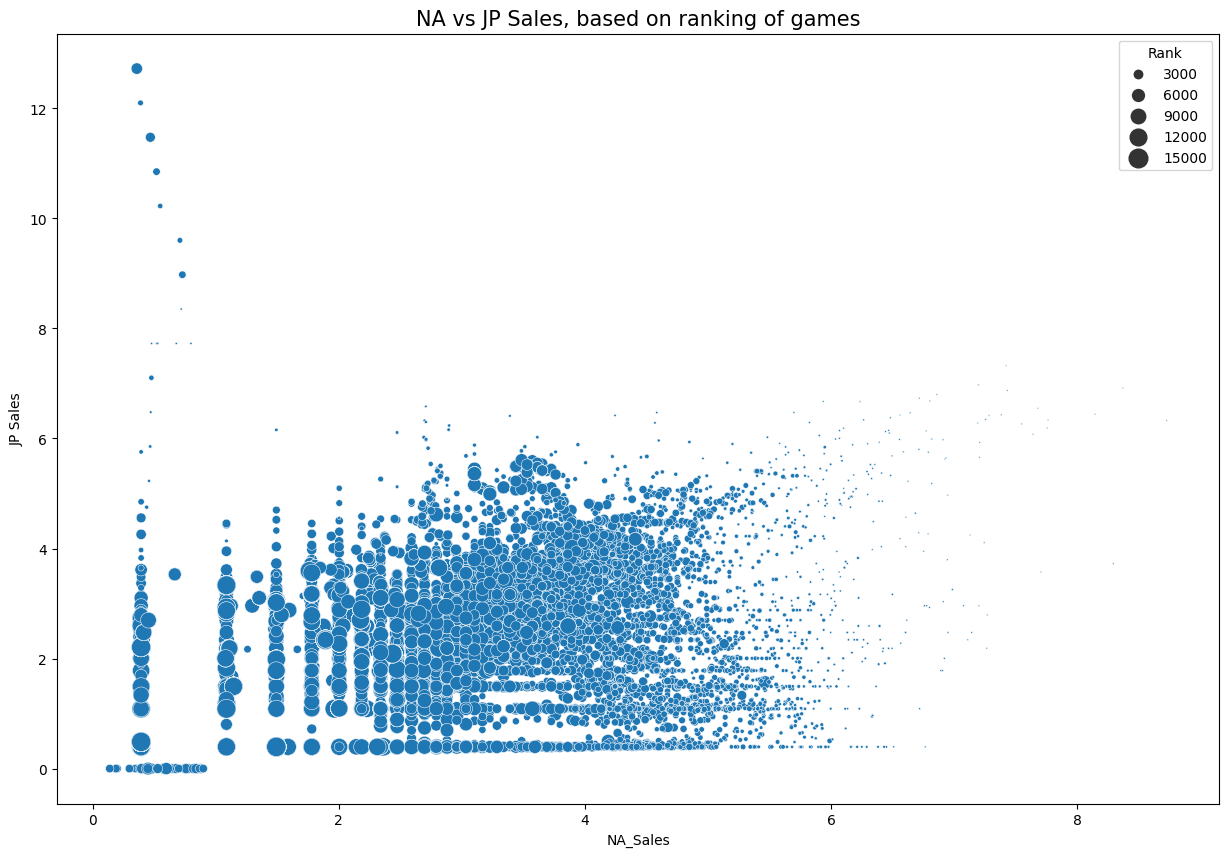

In [84]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data['NA_Sales'], y=data['JP_Sales'],data=top3_data, size=data['Rank'], sizes=(1, 200))
plt.xlabel('NA_Sales',fontsize=10)
plt.ylabel('JP Sales', fontsize=10)
plt.title('NA vs JP Sales, based on ranking of games', fontsize=15)
plt.show()

Inferences:
- Now interestingly, we can notice that higher ranking games are actually on the upper scale of sales, while lower ranking games are low on the sales side

## Subplots

So far we have **shown only 1 plot** using `plt.show()`

Say, we want to plot the trend of NA and every other region separately in a 
single figure

#### How can we plot multiple smaller plots at the same time?

We will use **subplots**, i.e., **divide the figure into smaller plots**


We will be using `plt.subplots()`
It takes mainly 2 arguments:

1. **No. of rows** we want to **divide our figure** into

2. **No. of columns** we want to **divide our figure** into

It returns 2 things:
- Figure
- Numpy Matrix of subplots


In [85]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(top3_data['NA_Sales'], top3_data['EU_Sales'])
fig.suptitle('Main title')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0.98, 'Main title')

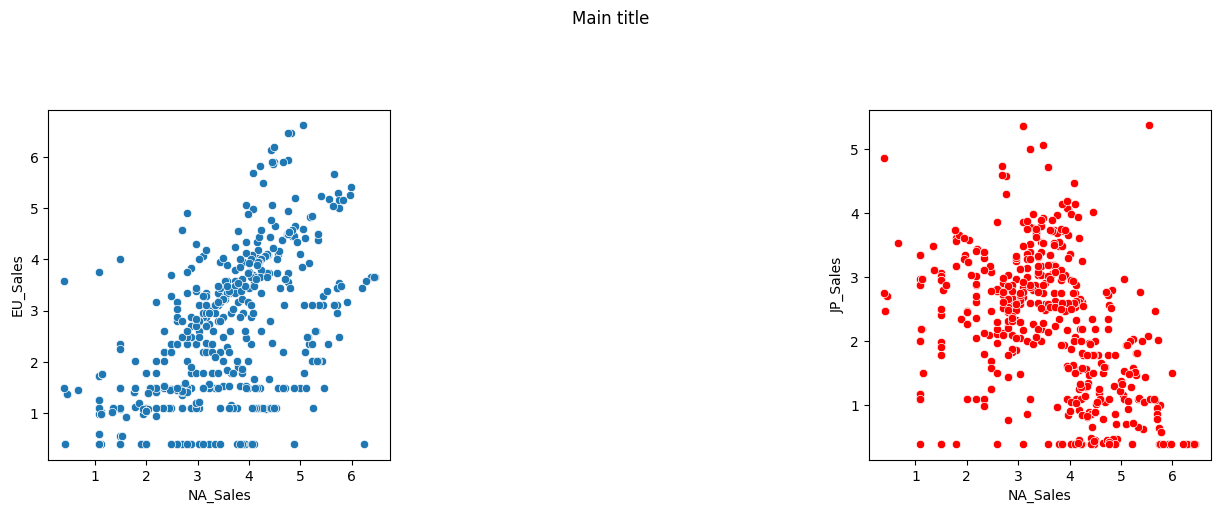

In [ ]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)


plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')

fig.suptitle('Main title')



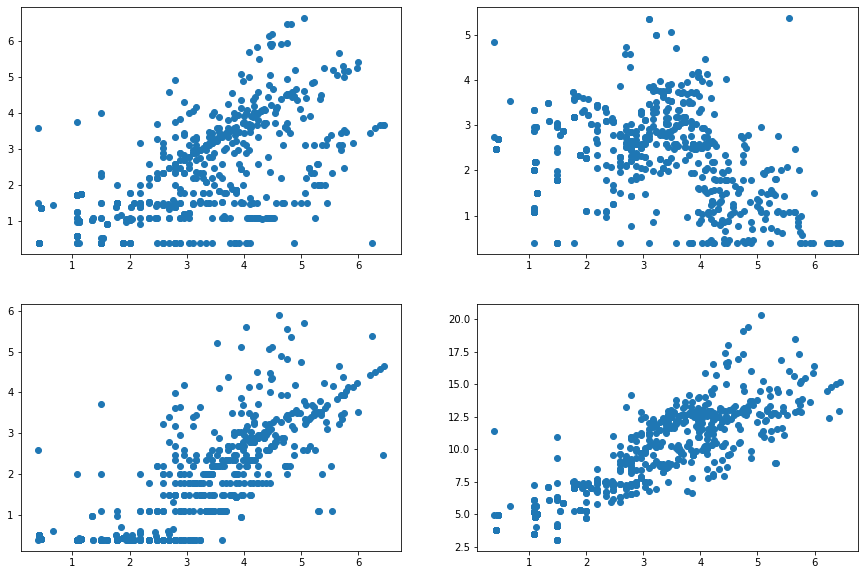

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0,0].scatter(top3_data['NA_Sales'], top3_data['EU_Sales'])
ax[0,1].scatter(top3_data['NA_Sales'], top3_data['JP_Sales'])
ax[1,0].scatter(top3_data['NA_Sales'], top3_data['Other_Sales'])
ax[1,1].scatter(top3_data['NA_Sales'], top3_data['Global_Sales'])

Notice, we are using 2 numbers during each plotting

Think of subplots as a 2x2 grids, with the two numbers denoting `x,y`/`row,column` coordinate of each subplot

#### What is this `ax` parameter exactly?

In [ ]:
print(ax)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aad891850>


Notice, 

- It's a 2x2 matrix of multiple axes objects

We are plotting each plot on a single `axes` object. 

Hence, we are using a 2D notation to access each grid/axes object of the subplot

Instead of accesing the individual axes using `ax[0, 0]`, `ax[1, 0]`, there is another method we can use too


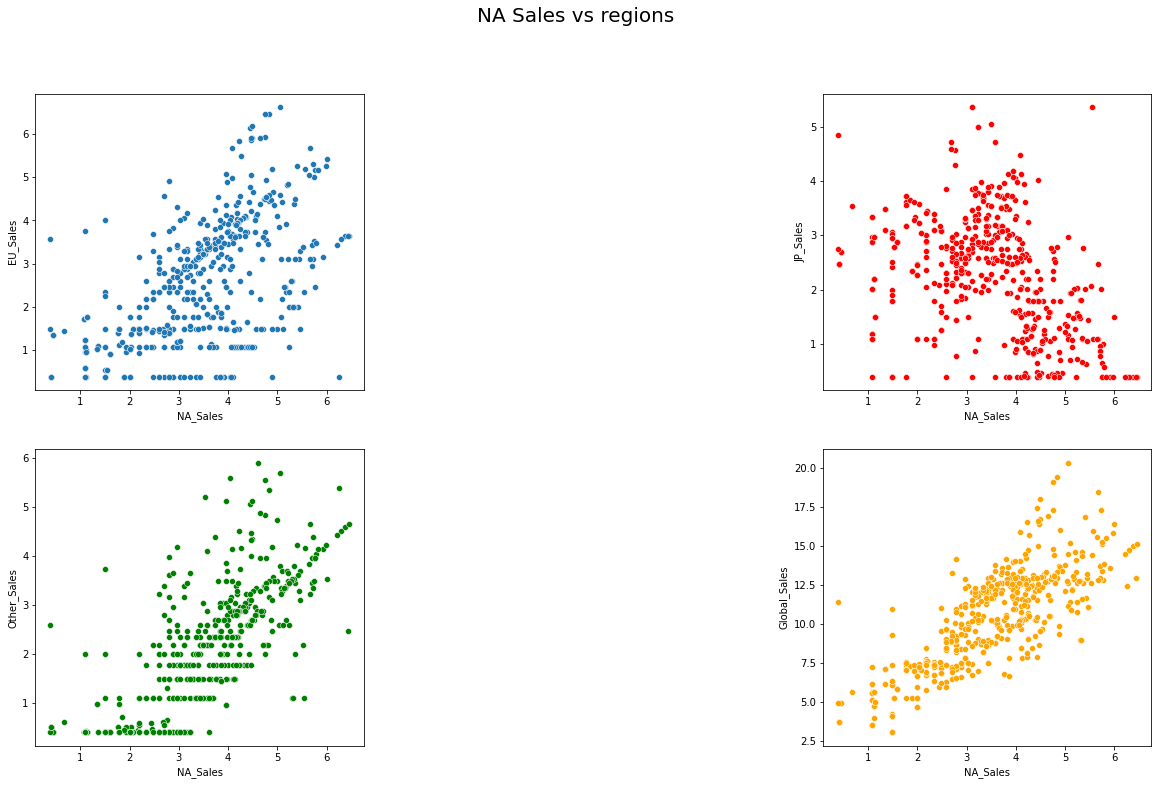

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,12)).suptitle("NA Sales vs regions",fontsize=20)
# Using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)


plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')


plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')

plt.show()

`Suptitle` adds a title to the whole figure

#### We need to observe a few things here

  1. The 3rd paramter defines the position of the plot
  2. The position/numbering starts from 1
  3. It goes on row-wise from start of row to its finish
  4. Empty subplots don't show any axes 

#### But how do we know which plot belongs to which category?

Basically the context of each plot

We can use `title`, `x/y label` and every other functionality for the subplots too



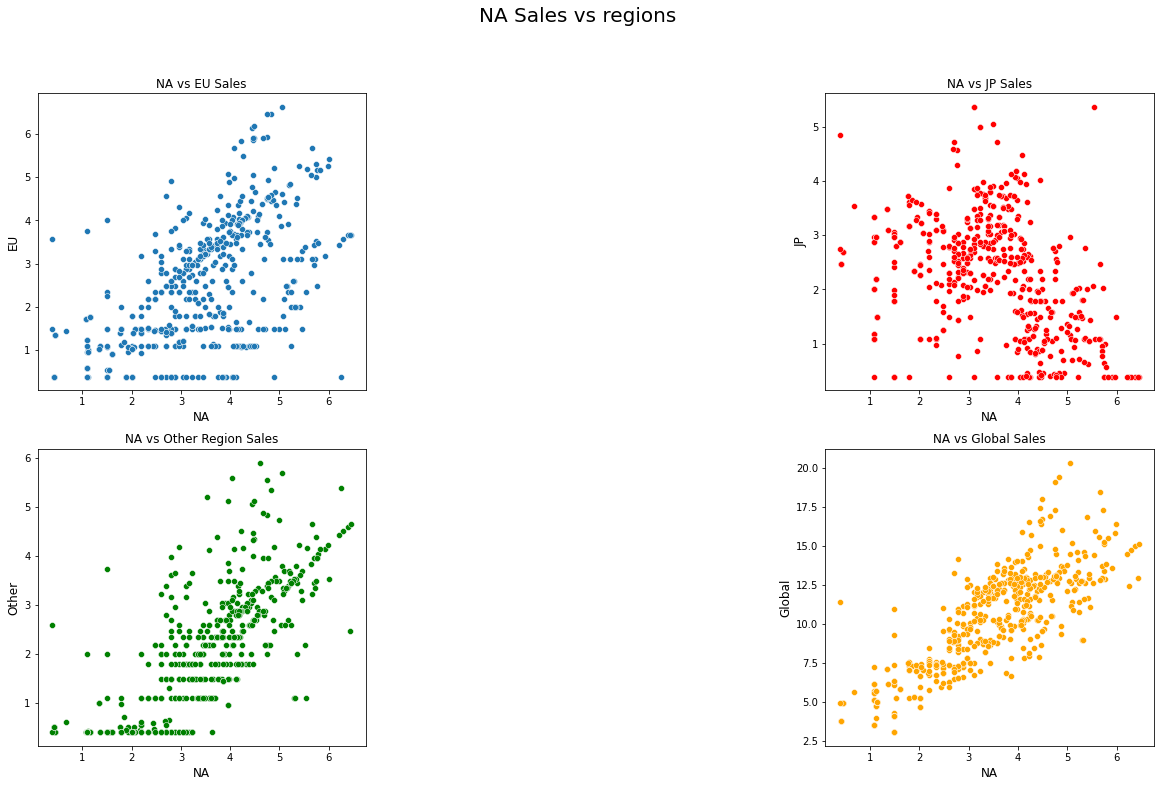

In [ ]:
plt.figure(figsize=(20,12)).suptitle("NA Sales vs regions",fontsize=20)
# Using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)



plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)


plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

plt.show()

#### What if we want to span a plot across the full length of the plot?

Think of this in **terms of a grid.**

Currently we are **dividing our plot into 2 rows and 3 columns**

But we want our plot to be across the middle column, with grids 2 and 5

This can be said as a **single column**

So, this problem can be simplified to plotting the plot across **second column in a 1 row 3 column subplot**

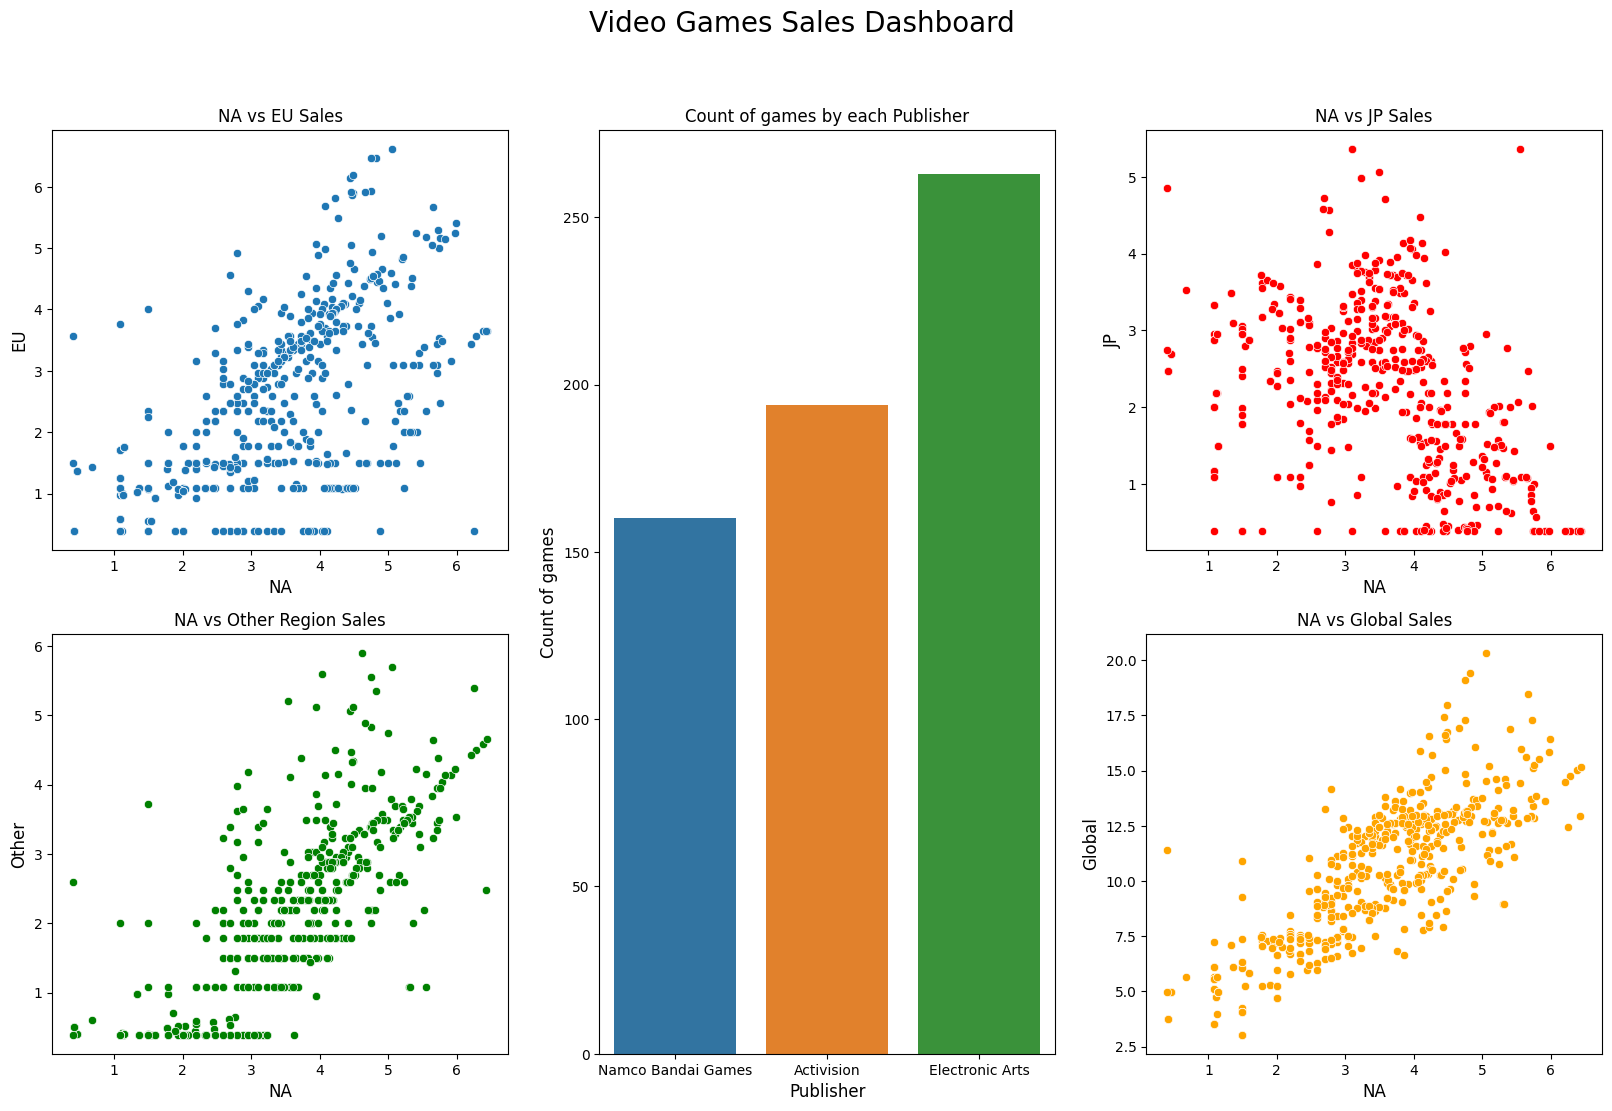

In [87]:
plt.figure(figsize=(20,12)).suptitle("Video Games Sales Dashboard",fontsize=20)
# Using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)



plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)

# Countplot of publishers
plt.subplot(1,3,2)
sns.countplot(x='Publisher', data=top3_data)
plt.title('Count of games by each Publisher', fontsize=12)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Count of games', fontsize=12)

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

plt.show()

## Joint Plot


#### Let's see a few more plots that we can visualize using `seaborn`

#### Joint Plot

- It draws a plot of two variables 


- It shows scatter, histogram and KDE graphs in the same plot.


#### Let's check it out

- We will take **`NA_Sales` as x-coordinates** and **`EU_Sales` as y-coordinates**


- We can select from different values for **parameter `kind`** and it **will plot accordingly**
    - "scatter" | "kde" | "hist" | "hex" | "reg" | "resid"


- We will set **parameter `kind`** to **`'reg'`** here

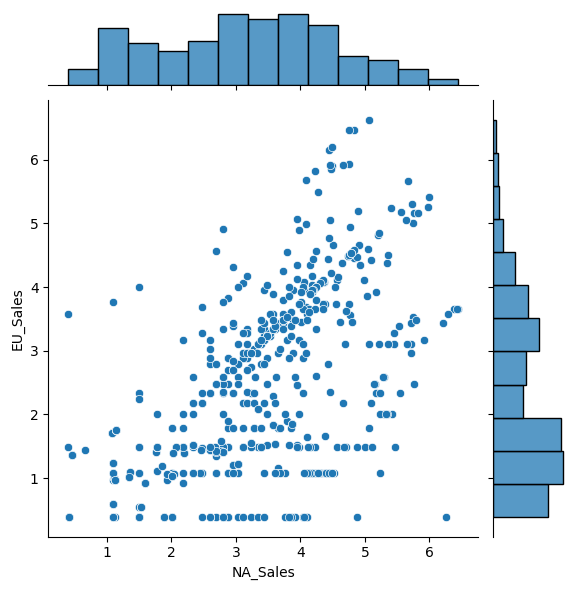

In [88]:
sns.jointplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.show()

#### As we can see here:

- `jointplot` plots **scatter, histogram and KDE in the same graph** when we set **`kind=reg`**


- Scatter shows the **scattering of (`NA_Sales`, `EU_Sales`) pairs as (x, y) points**


- Histogram and KDE shows the separate distributions of `NA_Sales` and `EU_Sales` in the data


#### We can also add hue to Joint Plot

- Let's check how the 3 Genres of games are distributed in terms of `NA_Sales` and 'EU_Sales`



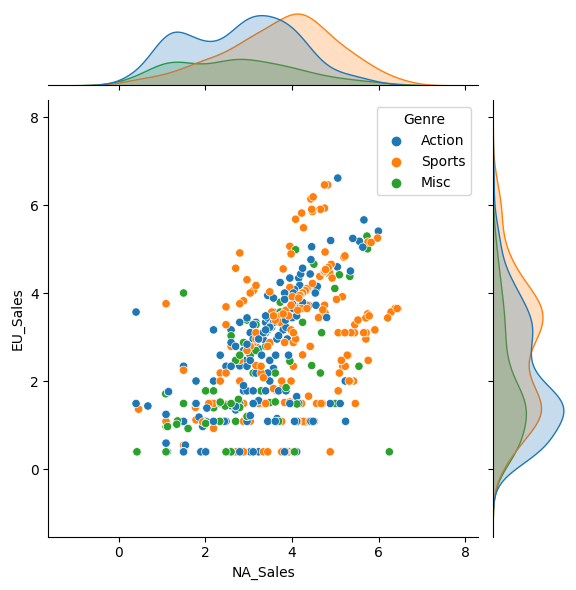

In [89]:
sns.jointplot(x='NA_Sales', y='EU_Sales', data=top3_data, hue='Genre')
plt.show()

## Pair Plot

- `pairplot()` in `seaborn` creates a **grid of Axes by default**


- Each numeric attribute in `data` is shared across the y-axes across a single row and the x-axes across a single column. 


- It displays a **scatterplot between each pair of attributes in the data** with different **hue** for each category


#### Since, the diagonal plots belong to same attribute at both x and y axis, they are treated differently

- A univariate distribution plot is drawn to show the marginal distribution of the data in each column.


#### Let's check it out

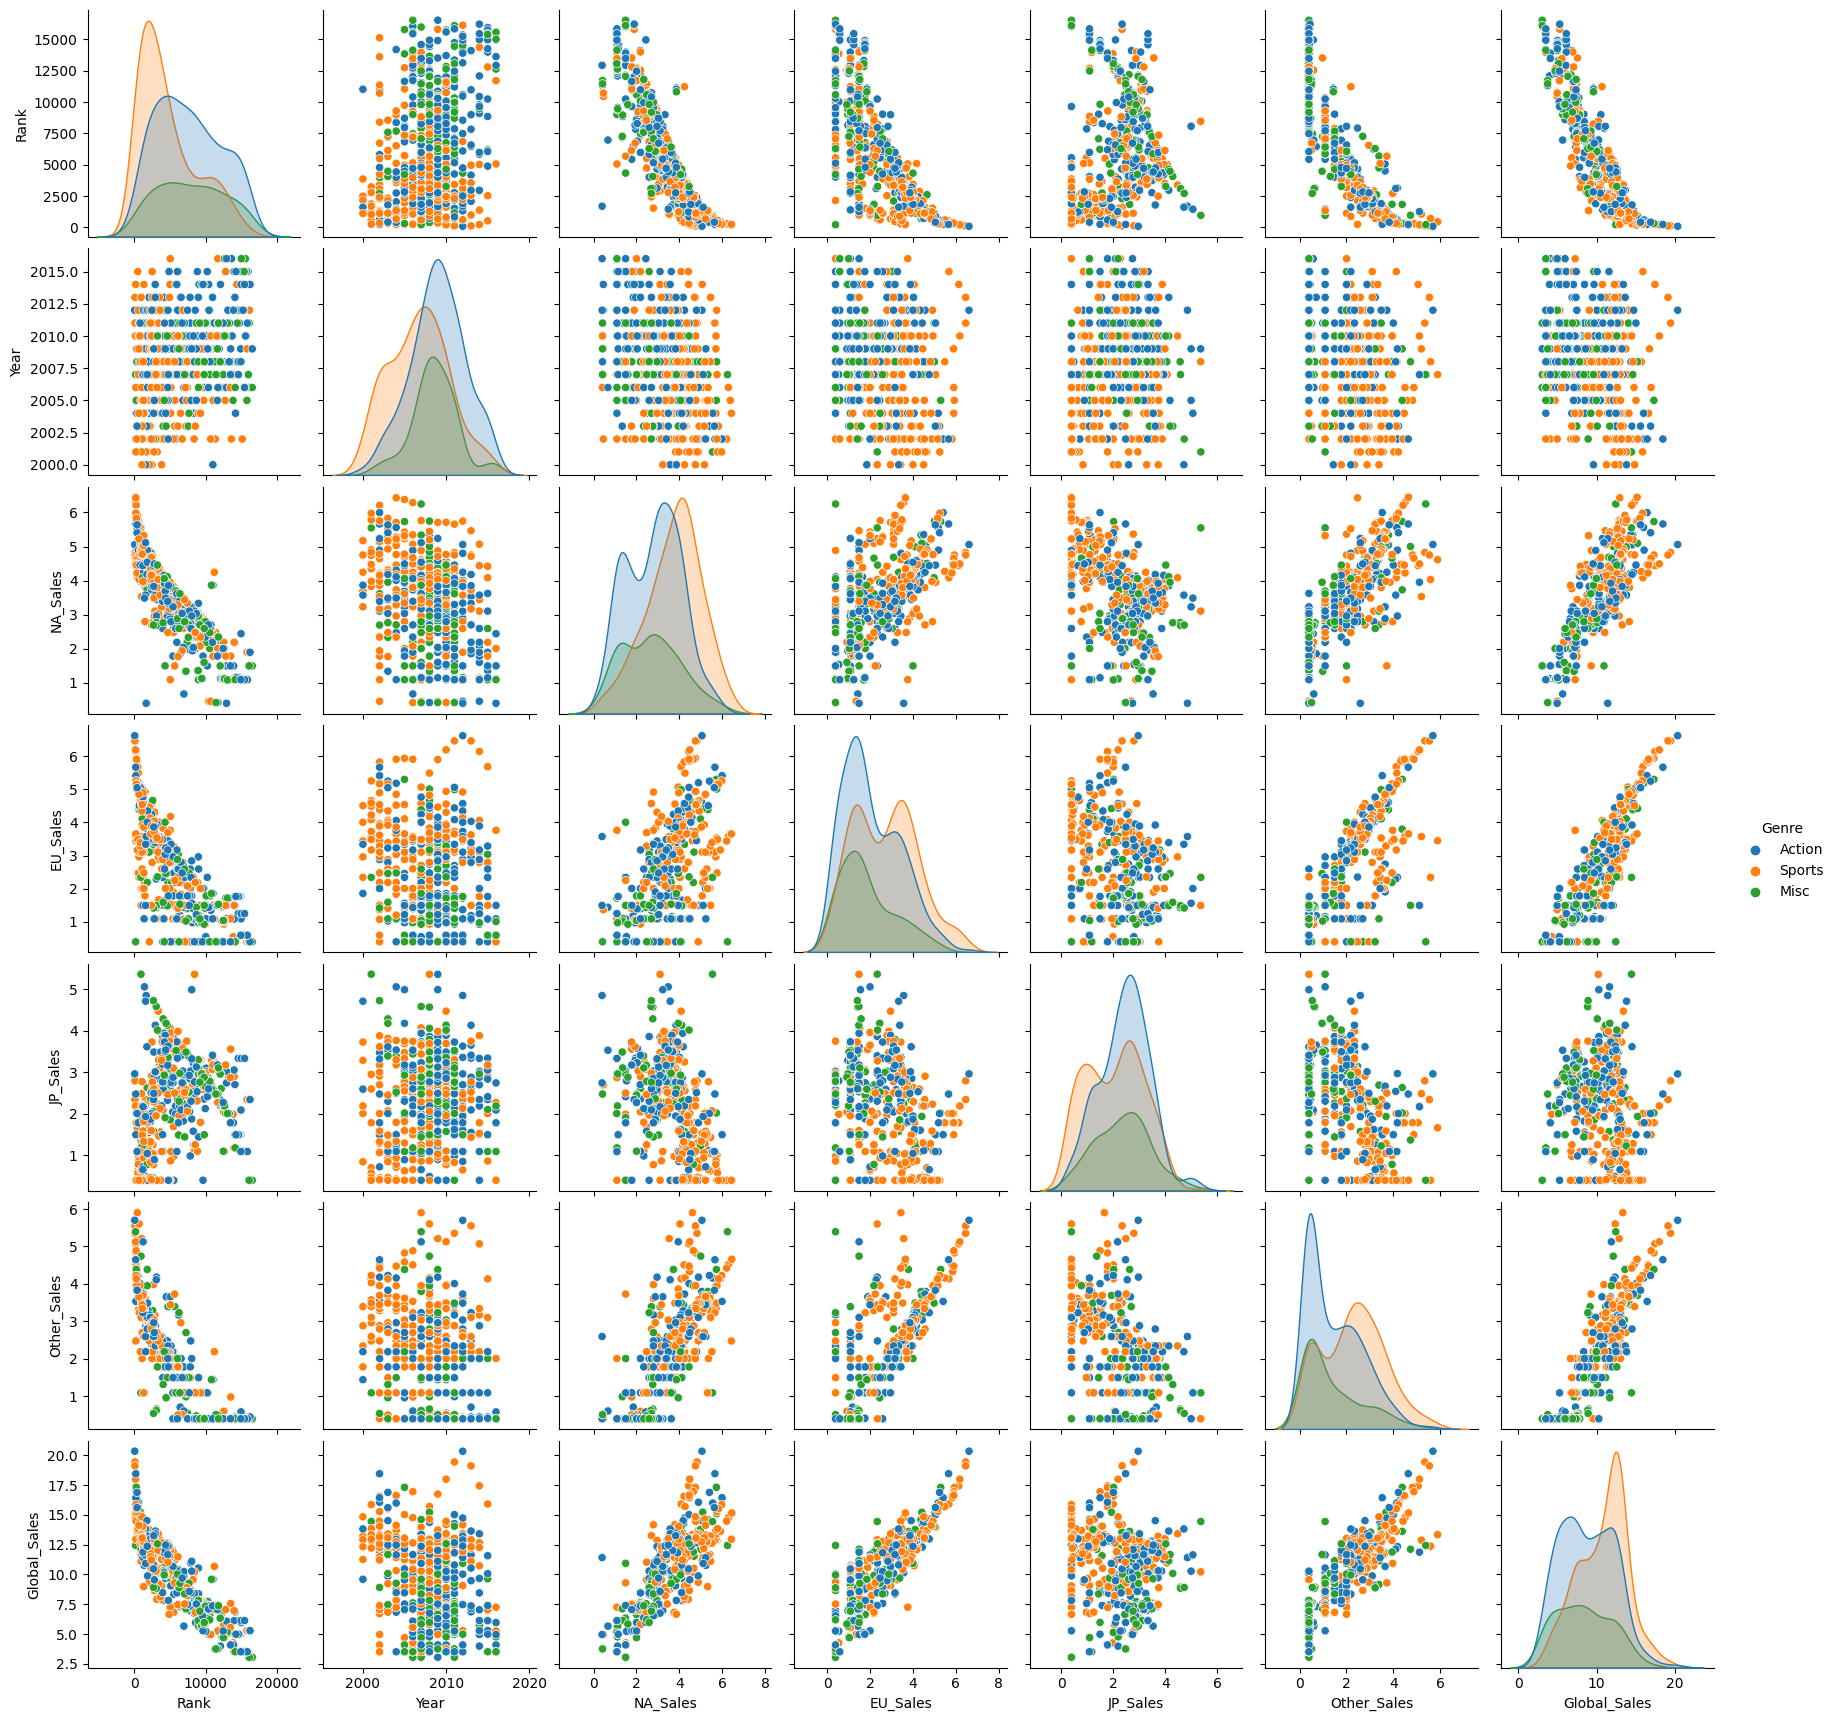

In [90]:
sns.pairplot(data=top3_data, hue='Genre')
plt.show()

#### Notice that:

- It is **like a scatterplot of video games with `hue='Genre'`**


- But the **scatter is plotted between every pair of attributes**


- **Colour Legends** for each genre category are given on **right side**


- It shows **relation between each pair of attributes**


#### Diagonal plots are different from scatterplots

- Because x and y axis have same attribute


- Diagonal plots show a univariate curve category-wise for each attribute


#### It is also possible to show a subset of variables or plot different variables on the rows and columns

- Feel free to experiment this on your own



## Finding correlations among attributes

- We can find the level of correlation b/w different attributes (variables)

#### But what exactly is a correlation?

- Two variables are correlated when **they change in same/opposite direction**


#### We can check coefficient of correlation using `corr()`

In [92]:
top3_data.corr()

ValueError: could not convert string to float: '.hack: Sekai no Mukou ni + Versus'

- Higher the **MAGNITUDE** of coefficient of correlation, more the variables are **correlated**

- The **sign just determines the direction of change**
    - `+` means increase in value of one variable causes increase in value of other variable
    - `-` means increase in value of one variable causes decrease in value of other variable, and vice versa


#### As you can see, `Global Sales` and `Rank` have the highest correlation coeff of -0.91

#### Let's plot it using scatter plot

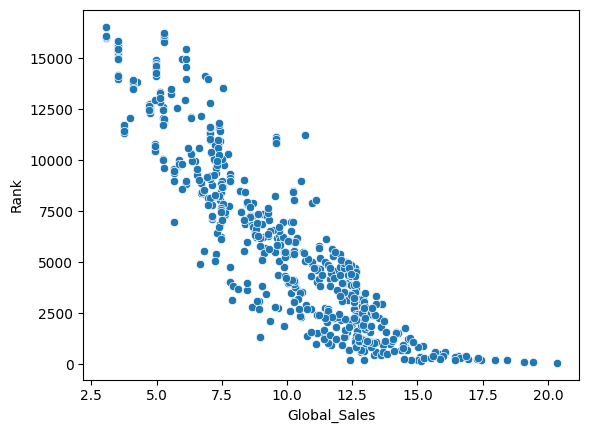

In [93]:
sns.scatterplot(x= 'Global_Sales', y= 'Rank', data = top3_data)
plt.show()

- When `petal_length` increases, `petal_width` also increases

#### But Remember

**Correlation does NOT mean Causation**

- We cannot conclude that change in values of a variable is causing change in values of other variable

#### Now, Let's look at a way to visualize correlation among variables

### Heat Map

- A heat map plots rectangular data as a color-encoded matrix.

- **Stronger the colour, stronger the correlation b/w the variables**

#### Let's plot a Heat Map using correlation coefficient matrix generated using `corr()`

In [94]:
sns.heatmap(top3_data.corr(), cmap= "Blues", annot=True)
plt.show()


ValueError: could not convert string to float: '.hack: Sekai no Mukou ni + Versus'

- **`annot=True`** is for writing correlation coeff inside each cell

#### You can change the colours of cells in Heat Map if you like

- There are a lot of options available!

In [ ]:
print(plt.colormaps())

In [ ]:
sns.heatmap(top3_data.corr(), cmap= "coolwarm", annot=True)
plt.show()